In [2]:
import pandas as pd
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load relevant data**

In [3]:
df = pd.read_csv(
    "/home/dl18206/Downloads/Re_ getting back on track _)/all_cs_clip_information.txt",
    sep="\t",
)
df.subject_id = df.subject_id.str.lower()

In [4]:
df

,subject_id,start.time,site,video.id,tags,classifications,behavior
0,60886059,0.0,bafing,BAF_A8/BAF_vid16_0340989_1432398_20151114/1201...,NaN,"CHIMPANZEE,CHIMPANZEE,CHIMPANZEE,NOTHINGHERE",TRAVELING
1,60886061,15.0,bafing,BAF_A8/BAF_vid16_0340989_1432398_20151114/1201...,NaN,"NOTHINGHERE,NOTHINGHERE,NOTHINGHERE",NaN
2,60886060,30.0,bafing,BAF_A8/BAF_vid16_0340989_1432398_20151114/1201...,NaN,"NOTHINGHERE,NOTHINGHERE,NOTHINGHERE",NaN
3,60886062,45.0,bafing,BAF_A8/BAF_vid16_0340989_1432398_20151114/1201...,NaN,"NOTHINGHERE,NOTHINGHERE,NOTHINGHERE",NaN
4,60886063,0.0,bafing,BAF_A8/BAF_vid16_0340989_1432398_20151114/1201...,"floridpostern,chimp,1_chimp","CHIMPANZEE,CHIMPANZEE,CHIMPANZEE,CHIMPANZEE,MO...",TRAVELING
...,...,...,...,...,...,...,...
33769,acp0004tfa,45.0,tair,tair_E4/tair_cam22_688836_647457_20131025/EK00...,"0_chimp,chimp,muddyfrost,tool_usage","blank,blank,blank",NaN
33770,acp0004tfv,0.0,tair,tair_E4/tair_cam22_688836_647457_20131025/EK00...,"1_chimp,camera_reaction,camtouch,chimp,dailyzo...","chimpanzee,chimpanzee,chimpanzee,chimpanzee,ch...","camera reaction,on the ground,playing,resting"
33771,acp0004tfw,15.0,tair,tair_E4/tair_cam22_688836_647457_20131025/EK00...,"1_chimp,camera_reaction,camtouch,chimp,juvenil...","chimpanzee,chimpanzee,chimpanzee,chimpanzee,ch...","camera reaction,on the ground,playing"
33772,acp0004tfx,30.0,tair,tair_E4/tair_cam22_688836_647457_20131025/EK00...,NaN,"blank,blank,blank",NaN


**Chimp & See annotations**

In [5]:
all_df = pd.read_csv(
    "/home/dl18206/Downloads/Re_ getting back on track _)/all_cs_clip_information.txt",
    sep="\t",
)
all_df["video"] = all_df["video.id"].str.lower()
acp_df = all_df[all_df["subject_id"].str.startswith("ACP")]
acp_df.subject_id = acp_df.subject_id.str.lower()

acp_df["bt"] = acp_df.behavior.astype(str) + "," + acp_df.tags.astype(str)
acp_df["split_tags"] = acp_df.bt.str.split(",")

<ipython-input-5-e12cf87258c9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acp_df.subject_id = acp_df.subject_id.str.lower()
<ipython-input-5-e12cf87258c9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acp_df["bt"] = acp_df.behavior.astype(str) + "," + acp_df.tags.astype(str)
<ipython-input-5-e12cf87258c9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [13]:
all_df = acp_df
tag_df = pd.read_csv(
    "/home/dl18206/Downloads/Re_ getting back on track _)/all_tags_behaviours.csv"
)

In [14]:
for col in tag_df.columns[1:]:
    unique_tags = tag_df[tag_df[col] == col].Tags.unique()
    all_df[col] = all_df.split_tags.apply(
        lambda x: 1 if any(i in x for i in unique_tags) else 0
    )

# Create column indicating empties
all_df["label_indicator"] = (
    all_df[tag_df.columns[1:]]
    .astype(int)
    .apply(lambda x: True if any([i for i in x]) else False, axis=1)
)

<ipython-input-14-22009997828b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df[col] = all_df.split_tags.apply(
<ipython-input-14-22009997828b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df[col] = all_df.split_tags.apply(


In [15]:
attr = all_df.columns[10:-10]
indicators = all_df.columns[-10:]

In [16]:
indicators

Index(['in_a_tree', 'tool_use_surface', 'tool_use_mound', 'night_chimps',
       'off_camera', 'no_behaviour', 'swelling', 'water', 'on_the_ground',
       'label_indicator'],
      dtype='object')

### **Parent class processing**

In [17]:
attr

Index(['camera_reaction', 'tool_use', 'object_carry', 'termite_fishing',
       'nut_cracking', 'stone_throw', 'bipedal', 'feeding', 'wood_eating',
       'chimp_carrying', 'vocalisation', 'travel', 'running', 'walking',
       'climbing', 'standing', 'aggression', 'charge', 'fight',
       'branch_shaking', 'hoot', 'grunt', 'mounting', 'sex', 'drinking',
       'piloerection', 'playing', 'social_interaction', 'defecating',
       'drumming', 'display', 'nursing', 'grooming', 'smelling',
       'cross_species_interaction', 'resting', 'sitting'],
      dtype='object')

In [18]:
all_df["p_camera_reaction"] = all_df.camera_reaction == 1

all_df["p_tool_use"] = (
    (all_df.tool_use == 1) | (all_df.termite_fishing == 1) | (all_df.nut_cracking == 1)
)

all_df["p_object_carrying"] = all_df.object_carry == 1

all_df["p_bipedal"] = all_df.bipedal == 1

all_df["p_feeding"] = (all_df.feeding == 1) | (all_df.wood_eating == 1)

all_df["p_chimp_carrying"] = all_df.chimp_carrying == 1

all_df["p_vocalisation"] = (
    (all_df.vocalisation == 1) | (all_df.hoot == 1) | (all_df.grunt == 1)
)

all_df["p_climbing"] = all_df.climbing == 1

all_df["p_aggression"] = (
    (all_df.aggression == 1) | (all_df.charge == 1) | (all_df.fight == 1)
)

all_df["p_travel"] = (
    (all_df.travel == 1) | (all_df.running == 1) | (all_df.walking == 1)
)

all_df["p_sex"] = (all_df.sex == 1) | (all_df.mounting == 1)

all_df["p_piloerection"] = all_df.piloerection == 1

all_df["p_social_interaction"] = (all_df.social_interaction == 1) | (
    all_df.nursing == 1
)

all_df["p_grooming"] = all_df.grooming == 1

all_df["p_display"] = (
    (all_df.display == 1)
    | (all_df.branch_shaking == 1)
    | (all_df.stone_throw == 1)
    | (all_df.drumming == 1)
)

all_df["p_cross_species_interaction"] = all_df.cross_species_interaction == 1

all_df["p_resting"] = all_df.resting == 1

all_df["p_playing"] = all_df.playing == 1

all_df["p_no_behaviour"] = (all_df.label_indicator == False) | (
    all_df.no_behaviour == 1
)

In [19]:
parent_attr = all_df.columns[-19:]

**Cross reference with local files**

In [20]:
all_df.subject_id.nunique()
acp_videos = pd.read_csv("data/internal/acp_prefixed_videos.csv", names=["subject_id"])
acp_videos.subject_id = acp_videos.subject_id.apply(lambda x: x.split(".")[0].lower())
all_df = all_df.merge(acp_videos, on="subject_id")

In [22]:
attr_of_interest = parent_attr

counts = (
    all_df[attr_of_interest].sum(axis=0).sort_values(ascending=False)
)  # occurence counts
counts / counts.sum() * 100

p_feeding                      18.650535
p_travel                       15.452878
p_no_behaviour                 13.062770
p_resting                      12.731468
p_camera_reaction               6.623085
p_climbing                      6.043306
p_social_interaction            5.782997
p_chimp_carrying                5.638052
p_tool_use                      3.410637
p_playing                       3.073419
p_vocalisation                  3.052713
p_grooming                      1.967106
p_object_carrying               1.940484
p_display                       0.647814
p_aggression                    0.520618
p_sex                           0.491037
p_bipedal                       0.420044
p_cross_species_interaction     0.340176
p_piloerection                  0.150861
dtype: float64

<AxesSubplot:>

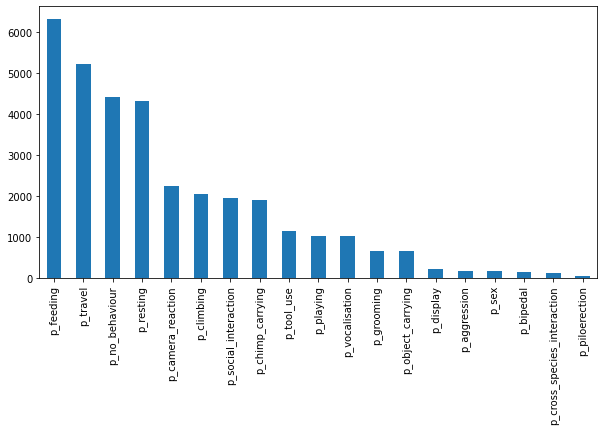

In [28]:
counts.plot(kind="bar", figsize=(10, 5))

In [24]:
dict(counts)

{'p_camera_reaction': 2239,
 'p_tool_use': 1153,
 'p_object_carrying': 656,
 'p_bipedal': 142,
 'p_feeding': 6305,
 'p_chimp_carrying': 1906,
 'p_vocalisation': 1032,
 'p_climbing': 2043,
 'p_aggression': 176,
 'p_travel': 5224,
 'p_sex': 166,
 'p_piloerection': 51,
 'p_social_interaction': 1955,
 'p_grooming': 665,
 'p_display': 219,
 'p_cross_species_interaction': 115,
 'p_resting': 4304,
 'p_playing': 1039,
 'p_no_behaviour': 4416}

<ipython-input-25-32085a416bbf>:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "color" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("behaviour_freq_dist.pdf", dpi=300, color="cyan", bbox_inches="tight")


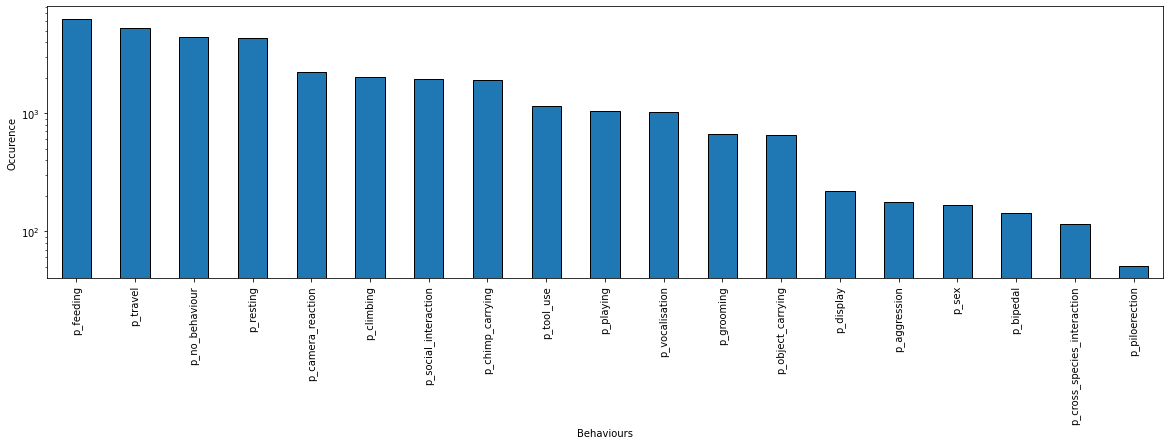

In [25]:
# Plot freq dist
ax = counts.plot.bar(figsize=(20, 5), edgecolor="black")
plt.yscale("log")
ax.set_xlabel("Behaviours")
ax.set_ylabel("Occurence")
plt.savefig("behaviour_freq_dist.pdf", dpi=300, color="cyan", bbox_inches="tight")

<AxesSubplot:>

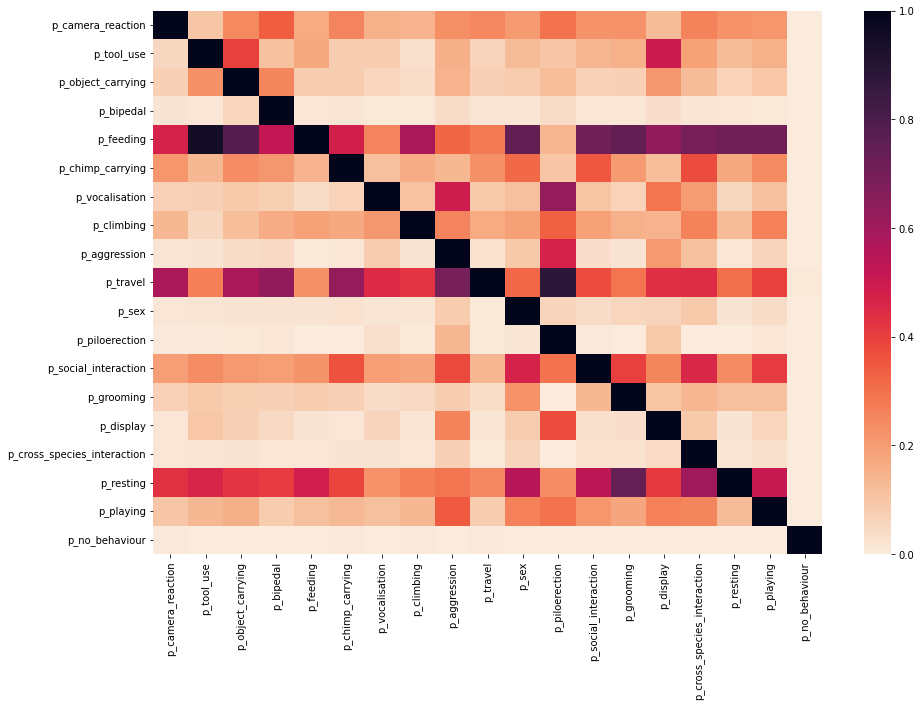

In [22]:
# Plot co-occurence matrix
coocc_df = all_df[attr_of_interest].astype(int)
coocc = coocc_df.T.dot(coocc_df)

# Make sure it is relative for vis
diag = np.diag(coocc)
rel_co_matrix = np.array([1 / x for x in diag]) * coocc

# Plot
plt.figure(figsize=(15, 10))
sns.heatmap(rel_co_matrix, cmap="rocket_r")

#### **Qualitative**

In [45]:
# Move BT column to front
bt = all_df.pop("bt")
all_df.insert(1, "bt", bt)

In [46]:
parent_attr

Index(['p_camera_reaction', 'p_tool_use', 'p_object_carrying', 'p_bipedal',
       'p_feeding', 'p_chimp_carrying', 'p_vocalisation', 'p_climbing',
       'p_aggression', 'p_travel', 'p_sex', 'p_piloerection',
       'p_social_interaction', 'p_grooming', 'p_display',
       'p_cross_species_interaction', 'p_resting', 'p_playing',
       'p_no_behaviour'],
      dtype='object')

In [47]:
all_df[all_df.p_tool_use == 1].head(20)

,subject_id,bt,start.time,site,video.id,tags,classifications,behavior,video,split_tags,...,p_travel,p_sex,p_piloerection,p_social_interaction,p_grooming,p_display,p_cross_species_interaction,p_resting,p_playing,p_no_behaviour
194,acp000086l,"carrying object,carrying young,drinking,feedin...",0.0,bili,BILI_D3/bili_vid03_241949_479203_20120929/PICT...,"4_chimp,carrying_object,chanel,chimp,cody,infa...","chimpanzee,chimpanzee,chimpanzee,chimpanzee,ch...","carrying object,carrying young,drinking,feedin...",bili_d3/bili_vid03_241949_479203_20120929/pict...,"[carrying object, carrying young, drinking, fe...",...,True,False,False,True,False,False,False,False,False,False
195,acp000086p,"carrying object,carrying young,drinking,feedin...",15.0,bili,BILI_D3/bili_vid03_241949_479203_20120929/PICT...,"2_chimp,chanel,chimp,chimps,cody,infant,niceto...","chimpanzee,chimpanzee,chimpanzee,chimpanzee,ch...","carrying object,carrying young,drinking,feedin...",bili_d3/bili_vid03_241949_479203_20120929/pict...,"[carrying object, carrying young, drinking, fe...",...,True,False,False,False,False,False,False,False,False,False
196,acp000086t,"carrying young,drinking,feeding,on the ground,...",30.0,bili,BILI_D3/bili_vid03_241949_479203_20120929/PICT...,"3_chimp,chanel,chimp,cody,infant,needcid,quiet...","chimpanzee,chimpanzee,chimpanzee,chimpanzee,ch...","carrying young,drinking,feeding,on the ground,...",bili_d3/bili_vid03_241949_479203_20120929/pict...,"[carrying young, drinking, feeding, on the gro...",...,False,False,False,True,False,False,False,True,False,False
197,acp000086x,"carrying young,drinking,feeding,on the ground,...",45.0,bili,BILI_D3/bili_vid03_241949_479203_20120929/PICT...,"3_chimp,bipedal,chanel,chimp,cody,infant,needc...","chimpanzee,chimpanzee,chimpanzee,chimpanzee,ch...","carrying young,drinking,feeding,on the ground,...",bili_d3/bili_vid03_241949_479203_20120929/pict...,"[carrying young, drinking, feeding, on the gro...",...,True,False,False,False,False,False,False,False,False,False
198,acp000086j,"carrying object,drinking,feeding,on the ground...",0.0,bili,BILI_D3/bili_vid03_241949_479203_20120929/PICT...,"1_chimp,astrea,chimp,quietwood,surface,termite...","chimpanzee,chimpanzee,chimpanzee,chimpanzee,ch...","carrying object,drinking,feeding,on the ground...",bili_d3/bili_vid03_241949_479203_20120929/pict...,"[carrying object, drinking, feeding, on the gr...",...,False,False,False,False,False,False,False,False,False,False
199,acp000086o,"camera reaction,carrying object,drinking,feedi...",15.0,bili,BILI_D3/bili_vid03_241949_479203_20120929/PICT...,"1_chimp,astrea,chimp,quietwood,surface,termite...","chimpanzee,chimpanzee,chimpanzee,chimpanzee,ch...","camera reaction,carrying object,drinking,feedi...",bili_d3/bili_vid03_241949_479203_20120929/pict...,"[camera reaction, carrying object, drinking, f...",...,True,False,False,False,False,False,False,False,False,False
200,acp000086r,"carrying object,drinking,feeding,on the ground...",30.0,bili,BILI_D3/bili_vid03_241949_479203_20120929/PICT...,"1_chimp,astrea,chimp,quietwood,surface,termite...","blank,chimpanzee,chimpanzee,chimpanzee,chimpan...","carrying object,drinking,feeding,on the ground...",bili_d3/bili_vid03_241949_479203_20120929/pict...,"[carrying object, drinking, feeding, on the gr...",...,False,False,False,False,False,False,False,False,False,False
201,acp000086v,"on the ground,traveling,1_chimp,astrea,bipedal...",45.0,bili,BILI_D3/bili_vid03_241949_479203_20120929/PICT...,"1_chimp,astrea,bipedal,chimp,quietwood,surface...","blank,chimpanzee,chimpanzee,chimpanzee,chimpan...","on the ground,traveling",bili_d3/bili_vid03_241949_479203_20120929/pict...,"[on the ground, traveling, 1_chimp, astrea, bi...",...,True,False,False,False,False,False,False,False,False,False
490,acp000b67y,"drinking,feeding,in a tree,on the ground,resti...",0.0,budongo,Bud_B2/Bud_cam10_336884_191472_20120803/PICT00...,"1_chimp,adult,chimp,coldfire,early_morning,mr_...","chimpanzee,chimpanzee,chimpanzee,chi

In [50]:
all_df[all_df.subject_id == "acp000coeq"]["video.id"].iloc[0]

'Bwi_B2/bwi_vid22_805001_9884029_20130120/PICT0203.AVI'

In [51]:
all_df[all_df.subject_id == "acp000coeq"]["bt"].iloc[0]

'carrying object,drumming,in a tree,resting,tool usage,vocalizing,0_chimp,chimp,restlessstar,vocal-only,vocal_only,vocalization'

**Generate train-test splits**

In [ ]:
from skmultilearn.model_selection import iterative_train_test_split

In [ ]:
X = all_df.subject_id.to_numpy().reshape((15636, 1))
labels = all_df[parent_attr].to_numpy()

In [ ]:
X_train, y_train, X_test, y_test = iterative_train_test_split(X, labels, test_size=0.30)
X_test, y_test, X_val, y_val = iterative_train_test_split(
    X_test, y_test, test_size=0.33
)

In [ ]:
# Train df
train_x_df = pd.DataFrame(X_train, columns=["video"])
train_y_df = pd.DataFrame(y_train, columns=parent_attr)
train_df = pd.concat([train_x_df, train_y_df], axis=1)

# Test df
test_x_df = pd.DataFrame(X_test, columns=["video"])
test_y_df = pd.DataFrame(y_test, columns=parent_attr)
test_df = pd.concat([test_x_df, test_y_df], axis=1)

# Val df
val_x_df = pd.DataFrame(X_val, columns=["video"])
val_y_df = pd.DataFrame(y_val, columns=parent_attr)
val_df = pd.concat([val_x_df, val_y_df], axis=1)

In [ ]:
print(
    f"Samples in train: {len(train_df)}\nSamples in test: {len(test_df)}\nSamples in val: {len(val_df)}"
)

In [ ]:
for dataframe in [train_df, val_df, test_df]:
    dataframe["label"] = (
        dataframe[parent_attr].astype(int).apply(to_label, axis=1).astype("category")
    )
    dataframe["label"] = dataframe.label.str.split(",")
    dataframe["label"] = dataframe.label.apply(lambda x: str([int(i) for i in x]))

In [ ]:
train_df.to_csv("data/internal/splits/final/train.csv", index=False)
test_df.to_csv("data/internal/splits/final/val.csv", index=False)
val_df.to_csv("data/internal/splits/final/test.csv", index=False)

**Dataset figures**

In [ ]:
# PanAf500
p500 = {
    "climbing_down": 1428,
    "standing": 42508,
    "walking": 62698,
    "sitting": 75325,
    "sitting_on_back": 2457,
    "climbing_up": 4219,
    "camera_interaction": 1939,
    "hanging": 8814,
    "running": 2128,
}

# PanAf20k
p20k = {
    "feeding": 4459,
    "travel": 2031,
    "tool_use": 1795,
    "camera_reaction": 1630,
    "vocalisation": 1177,
    "chimp_carrying": 1163,
    "climbing": 166,
    "bipedal": 165,
    "social_interaction": 116,
    "grooming": 65,
    "piloerection": 54,
    "display": 44,
    "aggression": 38,
    "defecating": 28,
    "drinking": 8,
    "sex": 3,
}

In [ ]:
# PanAf500
p500 = pd.DataFrame.from_dict(p500, orient="index", columns=["count"])
p500["behaviour"] = p500.index.values
p500.reset_index(drop=True, inplace=True)
pie = p500.plot.pie(
    y="count", labels=p500["behaviour"], autopct="%.0f%%", figsize=(5, 5)
)
fig = pie.get_figure()
fig.savefig("p500_pie.pdf")

In [ ]:
p20k_df = pd.DataFrame.from_dict(p20k, orient="index", columns=["count"])
p20k_df["behaviour"] = p20k_df.index.values
p20k_df.reset_index(drop=True, inplace=True)
p20k_df.plot.pie(
    y="count", labels=p20k_df["behaviour"], autopct="%.0f%%", figsize=(5, 5)
)
# fig = pie.get_figure()

In [ ]:
df = pd.DataFrame(
    [["potatoes", 20], ["carots", 39], ["tomatos", 40], ["apples", 2], ["bananas", 2]],
    columns=["aliments", "number"],
)

df_draw = df.copy()
df_draw.loc[df_draw["number"] < 20, "aliments"] = "vegetables"

df_draw = df_draw.groupby("aliments")["number"].sum().reset_index()

plt.pie(df_draw["number"], labels=df_draw["aliments"], autopct="%.0f%%")

In [ ]:
# PanAf20k
p20k = {
    "feeding": 4459,
    "travel": 2031,
    "tool_use": 1795,
    "camera_reaction": 1630,
    "vocalisation": 1177,
    "chimp_carrying": 1163,
    "climbing": 166,
    "bipedal": 165,
    "social_interaction": 116,
    "grooming": 65,
    "piloerection": 54,
    "display": 44,
    "aggression": 38,
    "defecating": 28,
    "drinking": 8,
    "sex": 3,
}

total = sum(p20k.values())
for x, y in p20k.items():
    print(x, y / total)

In [ ]:
p20k = {
    "feeding": 4459,
    "travel": 2031,
    "tool_use": 1795,
    "camera_reaction": 1630,
    "vocalisation": 1177,
    "chimp_carrying": 1163,
    "climbing": 166,
    "bipedal": 165,
    "social_interaction": 116,
    "grooming": 65,
    "piloerection": 54,
    "display": 44,
    "aggression": 38,
    "defecating": 28,
    "drinking": 8,
    "sex": 3,
}

In [ ]:
p20k = {
    "feeding": {
        "feeding": 373,
        "wood_eating": 2340,
    },
    "tool_use": {
        "tool_use": 1625,
        "tool_carry": 195,
        "termite_fishing": 105,
        "nut_cracking": 156,
        "honey_pound": 29,
    },
    "camera_reaction": {
        "camera_reaction_main": 1614,
        "camera_reaction_attraction": 59,
        "selfie": 74,
    },
    "vocalisation": {
        "vocalisation": 1169,
        "hoot": 86,
        "grunt": 36,
    },
    "chimp_carrying": {
        "chimp_carrying": 1163,
    },
    "climbing": {
        "climbing": 166,
    },
    "bipedal": {
        "bipedal": 165,
    },
    "social_interaction": {
        "social_interaction": 116,
        "grooming": 65,
    },
    "aggression": {
        "aggression": 36,
        "charge": 1,
        "fight": 3,
    },
    "travel": {
        "running": 1,
        "walking": 2,
        "travel": 2031,
    },
    "display": {
        "branch_shaking": 15,
        "display": 28,
        "stone_throw": 12,
    },
    "defecating": {
        "defecating": 28,
    },
    "sex": {
        "sex": 3,
    },
    "drinking": {
        "drinking": 8,
    },
    "piloerection": {
        "piloerection": 54,
    },
}

In [ ]:
p20k = {
    "feeding": {
        "feeding": 373,
        "wood_eating": 2340,
    },
    "tool_use": {
        "tool_use": 1625,
        "tool_carry": 195,
        "termite_fishing": 105,
        "nut_cracking": 156,
        "honey_pound": 29,
    },
    "camera_reaction": {
        "camera_reaction_main": 1614,
        "camera_reaction_attraction": 59,
        "selfie": 74,
    },
    "vocalisation": {
        "vocalisation": 1169,
        "hoot": 86,
        "grunt": 36,
    },
    "chimp_carrying": {
        "chimp_carrying": 1163,
    },
    "climbing": {
        "climbing": 166,
    },
    "bipedal": {
        "bipedal": 165,
    },
    "social_interaction": {
        "social_interaction": 116,
        "grooming": 65,
    },
    "travel": {
        "running": 1,
        "walking": 2,
        "travel": 2031,
    },
    "other": {
        "display": 65,
        "piloerection": 54,
        "defecating": 28,
        "drinking": 8,
        "aggression": 40,
        "sex": 3,
    },
}

In [ ]:
p20k_subclass = {
    "camera_reaction_main": 1614,
    "camera_reaction_attraction": 59,
    "off_camera": 300,
    "tool_use": 1625,
    "tool_carry": 195,
    "termite_fishing": 105,
    "nut_cracking": 156,
    "tool_use_surface": 7,
    "tool_use_mound": 96,
    "stone_throw": 12,
    "honey_pound": 29,
    "swelling": 596,
    "selfie": 74,
    "bipedal": 165,
    "night_chimps": 242,
    "feeding": 373,
    "wood_eating": 2340,
    "chimp_carrying": 1163,
    "vocalisation": 1169,
    "running": 1,
    "walking": 2,
    "climbing": 166,
    "standing": 1,
    "aggression": 36,
    "charge": 1,
    "travel": 57,
    "fight": 3,
    "branch_shaking": 15,
    "hoot": 86,
    "grunt": 36,
    "sex": 3,
    "water": 0,
    "drinking": 8,
    "piloerection": 54,
    "social_interaction": 116,
    "defecating": 28,
    "display": 28,
    "grooming": 65,
    "smelling": 1,
}

In [ ]:
for l, x in zip(outer_labels, outer_sizes):
    print(l, x / sum(outer_sizes))

In [ ]:
import matplotlib.pyplot as plt

# Define a nested dictionary
data = {
    "Outer Category 1": {"Inner Category 1A": 20, "Inner Category 1B": 30},
    "Outer Category 2": {"Inner Category 2A": 10, "Inner Category 2B": 40},
    "Outer Category 3": {"Inner Category 2A": 10, "Inner Category 2B": 40},
}

data = p20k
# Extract the outer categories and their sizes
outer_labels = list(data.keys())
outer_sizes = [sum(inner_dict.values()) for inner_dict in data.values()]

# Extract the inner categories and their sizes
inner_labels = [
    inner_key for inner_dict in data.values() for inner_key in inner_dict.keys()
]
inner_sizes = [
    inner_dict[inner_key]
    for inner_dict in data.values()
    for inner_key in inner_dict.keys()
]

# Define the colors for the inner and outer layers
outer_colors = ["tab:blue", "tab:orange"]
inner_colors = ["tab:green", "tab:red", "tab:purple", "tab:pink"]

# Create the two-layer nested pie chart
fig, ax = plt.subplots()
ax.pie(
    outer_sizes,
    labels=outer_labels,
    colors=outer_colors,
    wedgeprops=dict(width=0.4, edgecolor="w"),
)

ax.pie(
    inner_sizes,
    colors=inner_colors,
    radius=0.6,
    wedgeprops=dict(width=0.4, edgecolor="w"),
)

# Add a circle in the center to make it a donut chart
ax.add_artist(plt.Circle((0, 0), 0.4, color="white"))

# Set the title and show the chart
ax.set_title("Two-layer nested pie chart")
plt.savefig("nested_pie.pdf")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import colorsys

# Nested dictionary sample data
data = p20k

# Extract data and labels for the outer and inner rings
outer_labels, inner_labels, outer_sizes, inner_sizes, inner_colors = [], [], [], [], []
outer_colors = plt.cm.tab20c.colors

for i, (outer_key, inner_dict) in enumerate(data.items()):
    outer_labels.append(outer_key)
    outer_sizes.append(sum(inner_dict.values()))

    for inner_key, value in inner_dict.items():
        inner_labels.append(inner_key)
        inner_sizes.append(value)

        # Create different shades of the outer color for the inner ring
        r, g, b = outer_colors[i]
        h, l, s = colorsys.rgb_to_hls(r, g, b)
        l *= 0.5 + 0.5 * (
            len(inner_colors) % 2
        )  # Alternate between 50% and 100% lightness
        inner_colors.append(colorsys.hls_to_rgb(h, l, s))

# Plot nested pie chart
fig, ax = plt.subplots()
ax.pie(
    outer_sizes,
    labels=outer_labels,
    colors=outer_colors,
    radius=1.3,
    wedgeprops=dict(width=0.3, edgecolor="w"),
)
ax.pie(
    inner_sizes,
    colors=inner_colors,
    radius=1,
    wedgeprops=dict(width=0.3, edgecolor="w"),
)
centre_circle = plt.Circle((0, 0), 0.1, color="white", linewidth=0)

fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis("equal")
plt.tight_layout()
plt.show()

# plt.savefig('nested_pie.pdf')
# plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.DataFrame({"x": ["Market A", "Market B", "Market C"], "y": [45, 35, 20]})

In [ ]:
plt.figure(figsize=(8, 8))  # change the size of a figurelabels = df['x’]
sizes = df["y"]
labels = df["x"]

colors = ["#FFB600", "#09A0DA", "#8464a0"]
labels_subgroup = [
    "product A",
    "product B",
    "product C",
    "product D",
    "product E",
    "product F",
    "product G",
]
sizes_subgroup = [20, 15, 10, 20, 15, 10, 10]
colors_subgroup = [
    "#FFCE53",
    "#FFDA7E",
    "#FFE9B2",
    "#30B7EA",
    "#56C7F2",
    "#C8A2C9",
    "#D6A7DF",
]

In [ ]:
outside_donut = plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    startangle=90,
    frame=True,
    autopct="%.2f%%",
    pctdistance=0.85,
)
inside_donut = plt.pie(
    sizes_subgroup,
    labels=labels_subgroup,
    colors=colors_subgroup,
    radius=0.7,
    startangle=90,
    labeldistance=0.6,
    autopct="%.2f%%",
    pctdistance=0.4,
)
centre_circle = plt.Circle((0, 0), 0.1, color="white", linewidth=0)

fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis("equal")
plt.tight_layout()
plt.show()

In [ ]:
df